In [32]:
import numpy as np
import pandas as pd

In [33]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [34]:
df1= pd.read_csv('df3_4_5_6_7_8_9_1.csv')
df1 = reduce_mem_usage(df1)
df1.head()

Mem. usage decreased to 25.95 Mb (29.9% reduction)


,Unnamed: 0,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.906250,13.289062,1.0,credit_card,...,9.0,14.0,27277,volta redonda,SP,cool_stuff,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.875000,19.937500,1.0,credit_card,...,30.0,40.0,3471,sao paulo,SP,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.000000,17.875000,1.0,credit_card,...,13.0,33.0,37564,borda da mata,MG,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.992188,12.789062,1.0,credit_card,...,10.0,15.0,14403,franca,SP,perfumery,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.875000,18.140625,1.0,credit_card,...,40.0,30.0,87900,loanda,PR,garden_tools,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [35]:
df1.shape

(118318, 41)

In [36]:
df1.head()

,Unnamed: 0,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.906250,13.289062,1.0,credit_card,...,9.0,14.0,27277,volta redonda,SP,cool_stuff,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.875000,19.937500,1.0,credit_card,...,30.0,40.0,3471,sao paulo,SP,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.000000,17.875000,1.0,credit_card,...,13.0,33.0,37564,borda da mata,MG,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.992188,12.789062,1.0,credit_card,...,10.0,15.0,14403,franca,SP,perfumery,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.875000,18.140625,1.0,credit_card,...,40.0,30.0,87900,loanda,PR,garden_tools,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [37]:
df1.isna().sum()

Unnamed: 0                            0
order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                             0
review_score                          0
review_comment_title             104229
review_comment_message            67650
review_creation_date                  0
review_answer_timestamp               0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1254
order_delivered_customer_date      2588
order_estimated_delivery_date         0


## Irrelavant data columns dropping

In [38]:
## drop maximum missing value columns having more than 70% missing values from data

df1.drop(['review_comment_title','review_comment_message'],axis=1,inplace=True)

In [39]:
#drop all date column as they are irrelavant for our analysis and modeling purpose

df1.drop(['order_purchase_timestamp','order_approved_at','review_answer_timestamp','review_creation_date','shipping_limit_date','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'],axis=1,inplace=True)

In [40]:
## drop all irrelavant unique id columns as they mostly values are unique like more than 95000 so for analysis these are irrelavant and also removing the zip codes as we have same infor from the state columns


df1.drop(['Unnamed: 0','order_id','product_id','product_category_name','product_category_name_english','seller_id','review_id','customer_id','customer_unique_id','customer_zip_code_prefix','seller_zip_code_prefix'],axis=1,inplace=True)

In [41]:
## drop the cities as we have similar info from the states and city have various unique values so dropping it


df1.drop(['seller_city','customer_city'],axis=1,inplace=True)

In [42]:
df1.head()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_status,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_state,customer_state
0,1,58.906250,13.289062,1.0,credit_card,2.0,72.18750,5,delivered,58.0,598.0,4.0,650.0,28.0,9.0,14.0,SP,RJ
1,1,239.875000,19.937500,1.0,credit_card,3.0,259.75000,4,delivered,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,SP,SP
2,1,199.000000,17.875000,1.0,credit_card,5.0,216.87500,5,delivered,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,MG,MG
3,1,12.992188,12.789062,1.0,credit_card,2.0,25.78125,4,delivered,42.0,480.0,1.0,200.0,16.0,10.0,15.0,SP,SP
4,1,199.875000,18.140625,1.0,credit_card,3.0,218.00000,5,delivered,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,PR,SP


In [43]:
df1.isna().sum()

order_item_id                    0
price                            0
freight_value                    0
payment_sequential               3
payment_type                     3
payment_installments             3
payment_value                    3
review_score                     0
order_status                     0
product_name_lenght           1709
product_description_lenght    1709
product_photos_qty            1709
product_weight_g                20
product_length_cm               20
product_height_cm               20
product_width_cm                20
seller_state                     0
customer_state                   0
dtype: int64

## Missing value Treatment

In [44]:
## filling the missing values 

#1. for continuous variable fill with median
#2. for categorical variable fill with mode

In [45]:
## Filling the continuous data missing values with median which has 1-5% missing values only

df1['product_name_lenght']=df1['product_name_lenght'].fillna(df1['product_name_lenght'].median())

df1['product_description_lenght']=df1['product_description_lenght'].fillna(df1['product_name_lenght'].median())

df1['product_photos_qty']=df1['product_photos_qty'].fillna(df1['product_name_lenght'].median())

df1['product_weight_g']=df1['product_weight_g'].fillna(df1['product_weight_g'].median())

df1['product_length_cm']=df1['product_length_cm'].fillna(df1['product_length_cm'].median())

df1['product_height_cm']=df1['product_height_cm'].fillna(df1['product_height_cm'].median())

df1['product_width_cm']=df1['product_width_cm'].fillna(df1['product_width_cm'].median())

df1['payment_sequential']=df1['payment_sequential'].fillna(df1['payment_sequential'].median())

df1['payment_installments']=df1['payment_installments'].fillna(df1['payment_installments'].median())

df1['payment_value']=df1['payment_value'].fillna(df1['payment_value'].median())

## Filling the categorical data missing values with median which has 1-5% missing values only

df1['payment_type']=df1['payment_type'].fillna(df1['payment_type'].mode()[0])

df1.isnull().sum()

order_item_id                 0
price                         0
freight_value                 0
payment_sequential            0
payment_type                  0
payment_installments          0
payment_value                 0
review_score                  0
order_status                  0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
seller_state                  0
customer_state                0
dtype: int64

In [46]:
df1.head()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_status,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_state,customer_state
0,1,58.906250,13.289062,1.0,credit_card,2.0,72.18750,5,delivered,58.0,598.0,4.0,650.0,28.0,9.0,14.0,SP,RJ
1,1,239.875000,19.937500,1.0,credit_card,3.0,259.75000,4,delivered,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,SP,SP
2,1,199.000000,17.875000,1.0,credit_card,5.0,216.87500,5,delivered,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,MG,MG
3,1,12.992188,12.789062,1.0,credit_card,2.0,25.78125,4,delivered,42.0,480.0,1.0,200.0,16.0,10.0,15.0,SP,SP
4,1,199.875000,18.140625,1.0,credit_card,3.0,218.00000,5,delivered,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,PR,SP


# Categorical data treatment

Unique value reduction

In [47]:

df1.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [48]:

df1.order_status.unique()

array(['delivered', 'shipped', 'canceled', 'invoiced', 'processing',
       'approved', 'unavailable'], dtype=object)

In [49]:
# check unique values in seller_state for creating new classes for reducing irrelavant classes
df1.seller_state.unique()

array(['SP', 'MG', 'PR', 'SC', 'DF', 'RS', 'RJ', 'GO', 'MA', 'ES', 'BA',
       'PI', 'RO', 'MT', 'CE', 'RN', 'PE', 'SE', 'MS', 'PB', 'PA', 'AM',
       'AC'], dtype=object)

In [50]:
df1.seller_state.value_counts()

SP    84384
MG     9314
PR     9097
RJ     5036
SC     4271
RS     2294
DF      949
BA      700
GO      550
PE      465
MA      410
ES      390
MT      147
CE      103
MS       60
RN       56
PB       44
RO       14
PI       12
SE       10
PA        8
AM        3
AC        1
Name: seller_state, dtype: int64

In [51]:
# Reduce the unique values which has less value_counts as other states

df1['seller_state'] = df1['seller_state'].replace({'GO':'OTHERS', 'PE':'OTHERS','ES':'OTHERS','MT':'OTHERS','CE':'OTHERS','MS':'OTHERS',
                                                   'RN':'OTHERS','PB':'OTHERS','RO':'OTHERS','PI':'OTHERS','SE':'OTHERS','PA':'OTHERS','AM':'OTHERS',
                                                   'AC':'OTHERS'})

In [52]:
# check counts again with other category
df1.seller_state.value_counts()

SP        84384
MG         9314
PR         9097
RJ         5036
SC         4271
RS         2294
OTHERS     1863
DF          949
BA          700
MA          410
Name: seller_state, dtype: int64

In [53]:
# check unique values in customer_state for creating new classes for reducing irrelavant classes
df1.customer_state.unique()

array(['RJ', 'SP', 'MG', 'PR', 'GO', 'BA', 'AL', 'MS', 'CE', 'DF', 'RS',
       'PE', 'SC', 'ES', 'MA', 'PA', 'MT', 'PB', 'AM', 'AP', 'PI', 'TO',
       'RO', 'RN', 'SE', 'AC', 'RR'], dtype=object)

In [54]:
# check counts 
df1.seller_state.value_counts()

SP        84384
MG         9314
PR         9097
RJ         5036
SC         4271
RS         2294
OTHERS     1863
DF          949
BA          700
MA          410
Name: seller_state, dtype: int64

In [55]:
# Reduce the unique values which has less value_counts as other states

df1['customer_state'] = df1['customer_state'].replace({'MT':'OTHERS','MS':'OTHERS',
                                                   'RN':'OTHERS','PB':'OTHERS','RO':'OTHERS','PI':'OTHERS','SE':'OTHERS','PA':'OTHERS','AM':'OTHERS',
                                                   'AC':'OTHERS','MA':'OTHERS','AL':'OTHERS','TO':'OTHERS','AP':'OTHERS','RR':'OTHERS'})

In [56]:
# check counts again with other category
df1.customer_state.value_counts()

SP        49868
RJ        15425
MG        13718
OTHERS     7629
RS         6539
PR         5988
SC         4319
BA         4069
DF         2500
GO         2453
ES         2351
PE         1903
CE         1556
Name: customer_state, dtype: int64

In [57]:
df1.head()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_status,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_state,customer_state
0,1,58.906250,13.289062,1.0,credit_card,2.0,72.18750,5,delivered,58.0,598.0,4.0,650.0,28.0,9.0,14.0,SP,RJ
1,1,239.875000,19.937500,1.0,credit_card,3.0,259.75000,4,delivered,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,SP,SP
2,1,199.000000,17.875000,1.0,credit_card,5.0,216.87500,5,delivered,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,MG,MG
3,1,12.992188,12.789062,1.0,credit_card,2.0,25.78125,4,delivered,42.0,480.0,1.0,200.0,16.0,10.0,15.0,SP,SP
4,1,199.875000,18.140625,1.0,credit_card,3.0,218.00000,5,delivered,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,PR,SP


In [58]:
df1.corr()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
order_item_id,1.000000,-0.060460,-0.030696,-0.002872,0.073798,0.265187,-0.131932,-0.024217,-0.014170,-0.019803,-0.004324,0.005360,0.029170,-0.009457
price,-0.060460,1.000000,0.415934,0.006834,0.277673,0.739256,-0.005441,0.017660,0.198999,0.009151,0.339223,0.145517,0.224256,0.172554
freight_value,-0.030696,0.415934,1.000000,0.022343,0.185709,0.373769,-0.037284,0.021882,0.097027,-0.008493,0.611592,0.309666,0.393881,0.325333
payment_sequential,-0.002872,0.006834,0.022343,1.000000,-0.086122,-0.064199,-0.003854,-0.005210,0.008688,0.004729,0.043979,0.048957,0.024471,0.031057
payment_installments,0.073798,0.277673,0.185709,-0.086122,1.000000,0.273697,-0.042998,0.020074,0.037846,-0.016993,0.177535,0.117635,0.122307,0.137923
payment_value,0.265187,0.739256,0.373769,-0.064199,0.273697,1.000000,-0.084408,0.001956,0.155355,-0.007736,0.303274,0.138741,0.217143,0.148590
review_score,-0.131932,-0.005441,-0.037284,-0.003854,-0.042998,-0.084408,1.000000,-0.006357,0.011803,-0.009629,-0.028849,-0.021123,-0.026759,-0.010934
product_name_lenght,-0.024217,0.017660,0.021882,-0.005210,0.020074,0.001956,-0.006357,1.000000,0.084173,0.077282,0.020269,0.057252,-0.031326,0.060537
product_description_lenght,-0.014170,0.198999,0.097027,0.008688,0.037846,0.155355,0.011803,0.084173,1.000000,-0.096525,0.063532,0.010987,0.075332,-0.063256
product_photos_qty,-0.019803,0.009151,-0.008493,0.004729,-0.016993,-0.007736,-0.009629,0.077282,-0.096525,1.000000,-0.001524,-0.013702,-0.025573,-0.026515


In [59]:
## Save data after preprocessing



#df1.to_csv("olist_final_data.csv")

### convert categorial/non numeric data to numeric data using one hot encoding

In [30]:
#df1= pd.read_csv('olist_final_data.csv')

In [60]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


# one hot encoding on payment_type
ohe =  pd.get_dummies(df1['payment_type'],prefix ='payment_type',drop_first=True)
df1= pd.concat([df1,ohe],axis=1)
df1.drop('payment_type',axis=1,inplace=True)


# one hot encoding on order_status

ohe1 =  pd.get_dummies(df1['order_status'],prefix ='order_status',drop_first=True)
df1= pd.concat([df1,ohe1],axis=1)
df1.drop('order_status',axis=1,inplace=True)


# one hot encoding on seller_state
ohe2 =  pd.get_dummies(df1['seller_state'],prefix ='seller_state',drop_first=True)
df1= pd.concat([df1,ohe2],axis=1)
df1.drop('seller_state',axis=1,inplace=True)


# one hot encoding on customer_state
ohe3 =  pd.get_dummies(df1['customer_state'],prefix ='customer_state',drop_first=True)
df1= pd.concat([df1,ohe3],axis=1)
df1.drop('customer_state',axis=1,inplace=True)

df1.head()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,...,customer_state_ES,customer_state_GO,customer_state_MG,customer_state_OTHERS,customer_state_PE,customer_state_PR,customer_state_RJ,customer_state_RS,customer_state_SC,customer_state_SP
0,1,58.906250,13.289062,1.0,2.0,72.18750,5,58.0,598.0,4.0,...,0,0,0,0,0,0,1,0,0,0
1,1,239.875000,19.937500,1.0,3.0,259.75000,4,56.0,239.0,2.0,...,0,0,0,0,0,0,0,0,0,1
2,1,199.000000,17.875000,1.0,5.0,216.87500,5,59.0,695.0,2.0,...,0,0,1,0,0,0,0,0,0,0
3,1,12.992188,12.789062,1.0,2.0,25.78125,4,42.0,480.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,1,199.875000,18.140625,1.0,3.0,218.00000,5,59.0,409.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
## check info after conversion from categorical to numeric for checking the right conversion
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118318 entries, 0 to 118317
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_item_id               118318 non-null  int8   
 1   price                       118318 non-null  float16
 2   freight_value               118318 non-null  float16
 3   payment_sequential          118318 non-null  float16
 4   payment_installments        118318 non-null  float16
 5   payment_value               118318 non-null  float16
 6   review_score                118318 non-null  int8   
 7   product_name_lenght         118318 non-null  float16
 8   product_description_lenght  118318 non-null  float16
 9   product_photos_qty          118318 non-null  float16
 10  product_weight_g            118318 non-null  float16
 11  product_length_cm           118318 non-null  float16
 12  product_height_cm           118318 non-null  float16
 13  product_width_

In [62]:
df1.isna().sum()

order_item_id                 0
price                         0
freight_value                 0
payment_sequential            0
payment_installments          0
payment_value                 0
review_score                  0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
payment_type_credit_card      0
payment_type_debit_card       0
payment_type_voucher          0
order_status_canceled         0
order_status_delivered        0
order_status_invoiced         0
order_status_processing       0
order_status_shipped          0
order_status_unavailable      0
seller_state_DF               0
seller_state_MA               0
seller_state_MG               0
seller_state_OTHERS           0
seller_state_PR               0
seller_state_RJ               0
seller_state_RS               0
seller_state_SC               0
seller_s

In [39]:
df1.corr()

,Unnamed: 0,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,...,customer_state_ES,customer_state_GO,customer_state_MG,customer_state_OTHERS,customer_state_PE,customer_state_PR,customer_state_RJ,customer_state_RS,customer_state_SC,customer_state_SP
Unnamed: 0,1.000000,-0.005054,0.001485,-0.001980,0.007235,-0.000950,-0.004300,0.001976,0.002422,-0.000032,...,0.001204,-0.002244,0.002803,-0.006973,-0.000288,0.002624,0.001246,-0.003422,0.001638,0.003426
order_item_id,-0.005054,1.000000,-0.060462,-0.030697,-0.002872,0.073798,0.265195,-0.131932,-0.024217,-0.014170,...,-0.010913,0.027553,-0.008228,-0.010741,-0.014600,0.005908,-0.008630,0.003643,0.005038,0.014424
price,0.001485,-0.060462,1.000000,0.415937,0.006835,0.277676,0.739286,-0.005442,0.017661,0.198997,...,0.000370,0.005556,-0.001321,0.055996,0.015628,-0.002859,0.008282,0.000578,0.004605,-0.050105
freight_value,-0.001980,-0.030697,0.415937,1.000000,0.022346,0.185713,0.373788,-0.037283,0.021883,0.097026,...,0.017480,0.024943,0.013197,0.246361,0.102368,0.008058,0.025952,0.027072,0.017352,-0.260919
payment_sequential,0.007235,-0.002872,0.006835,0.022346,1.000000,-0.086122,-0.064202,-0.003854,-0.005210,0.008688,...,-0.009571,-0.003805,-0.019071,0.008238,-0.005902,-0.008586,0.012098,-0.005537,-0.015294,0.020707
payment_installments,-0.000950,0.073798,0.277676,0.185713,-0.086122,1.000000,0.273710,-0.042998,0.020074,0.037846,...,0.004467,0.009559,0.016292,0.038107,0.028794,0.004989,0.013065,0.009462,0.001787,-0.071170
payment_value,-0.004300,0.265195,0.739286,0.373788,-0.064202,0.273710,1.000000,-0.084410,0.001956,0.155361,...,0.000398,0.021063,-0.003157,0.056025,0.012472,0.005257,0.011207,0.003751,0.007278,-0.061200
review_score,0.001976,-0.131932,-0.005442,-0.037283,-0.003854,-0.042998,-0.084410,1.000000,-0.006357,0.011803,...,-0.006187,-0.007223,0.014242,-0.023874,-0.006648,0.013198,-0.061941,0.003363,-0.003783,0.060201
product_name_lenght,0.002422,-0.024217,0.017661,0.021883,-0.005210,0.020074,0.001956,-0.006357,1.000000,0.084173,...,0.002103,0.011253,0.002580,0.007585,0.005781,0.002267,-0.013576,0.006362,0.001180,-0.008132
product_description_lenght,-0.000032,-0.014170,0.198997,0.097026,0.008688,0.037846,0.155361,0.011803,0.084173,1.000000,...,-0.003186,0.002102,-0.004269,0.029642,0.010911,0.006662,-0.007698,-0.005477,0.005994,-0.022016


# Kmeans Clustering

In [63]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import seaborn as sns

In [64]:
## check the exact number of cluster for the data 

range_1=range(1,15)
cluster_inertia=[]
for num_clusters in range(1,15):
    kmeans=KMeans(n_clusters=num_clusters,random_state=123)
    kmeans.fit(df1)
    cluster_inertia.append(kmeans.inertia_)

In [65]:
kmeans.labels_  # tell us that label belongs to cluster

array([ 0,  3, 12, ..., 10,  9,  0])

In [66]:
# check the inertia of the cluster in order to decide the highly heterogenius between the cluster and homogenius within the cluster
cluster_inertia

[1759428859875.7034,
 569086102998.4042,
 287946391029.83093,
 205031228772.72476,
 153389409304.7776,
 120484256911.47894,
 96598275920.92223,
 82661061038.62819,
 71304416254.89836,
 63484880428.64964,
 57133212589.854935,
 51939032661.10692,
 48636402726.18811,
 45944353568.65367]

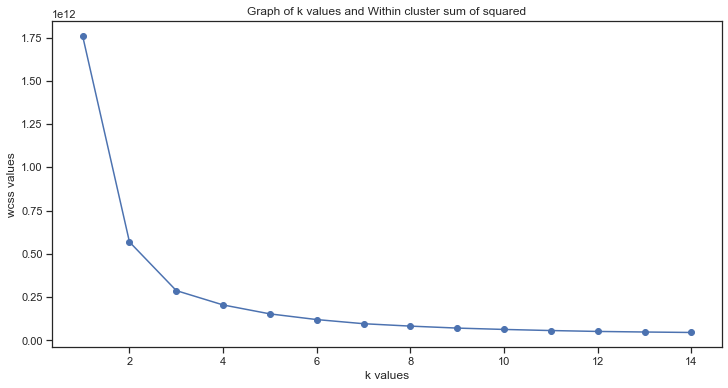

In [67]:
# check the exact number of cluster using Elbow plot

plt.figure(figsize=(12,6))
plt.plot( range_1, cluster_inertia, marker = "o" )  #elbow graph
plt.title('Graph of k values and Within cluster sum of squared')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

## after 4 there is no such pattern so decided number of cluster is 4 here

In [68]:
## after deciding the k values or the number or cluster from elbow then retraining the kmeans model with optimal cluster value

In [69]:
# Now we know our best k value is 4, So creating a new kmeans model:
kmeans2 = KMeans(n_clusters=4, n_init=15 ,random_state=123)

# Training the clustering model:
clusters = kmeans2.fit_predict(df1)

# Adding a label feature with the predicted class values:
df_k = df1.copy(deep=True)   # copy for not disturbing the dataframe
df_k['label'] = clusters

In [70]:
df_k['label'].unique()   # 4 cluster labels are here

array([0, 2, 3, 1])

In [71]:
df_k.head()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,...,customer_state_GO,customer_state_MG,customer_state_OTHERS,customer_state_PE,customer_state_PR,customer_state_RJ,customer_state_RS,customer_state_SC,customer_state_SP,label
0,1,58.906250,13.289062,1.0,2.0,72.18750,5,58.0,598.0,4.0,...,0,0,0,0,0,1,0,0,0,0
1,1,239.875000,19.937500,1.0,3.0,259.75000,4,56.0,239.0,2.0,...,0,0,0,0,0,0,0,0,1,2
2,1,199.000000,17.875000,1.0,5.0,216.87500,5,59.0,695.0,2.0,...,0,1,0,0,0,0,0,0,0,0
3,1,12.992188,12.789062,1.0,2.0,25.78125,4,42.0,480.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,1,199.875000,18.140625,1.0,3.0,218.00000,5,59.0,409.0,1.0,...,0,0,0,0,0,0,0,0,1,3


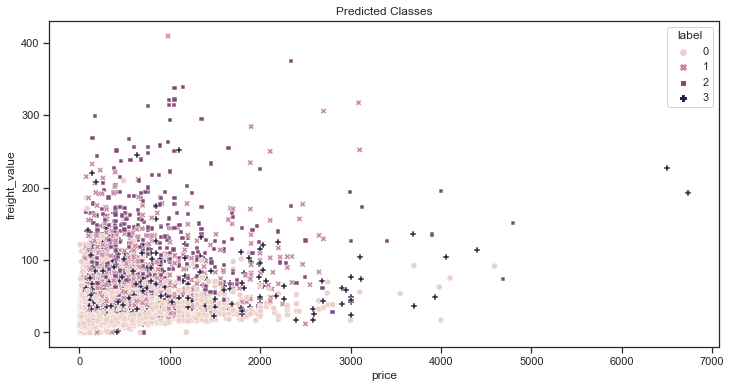

In [40]:
# ploting the figure of cluster for any two features

plt.figure(figsize=(12,6))
plt.title('Predicted Classes')
sns.scatterplot(x='price', y='freight_value', hue='label', style='label', data=df_k)
plt.show()

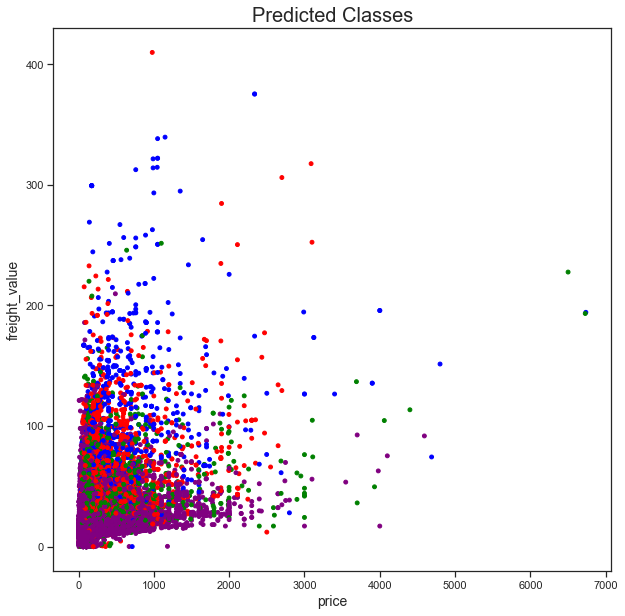

In [72]:
# ploting the figure of cluster for any two features

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df_k['price'],df_k['freight_value'],c=df_k['label'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Predicted Classes',fontsize=20)
plt.xlabel('price',fontsize=14)
plt.ylabel('freight_value',fontsize=14)
plt.show()

Text(0.5, 0.92, '3D plot of KMeans Clustering')

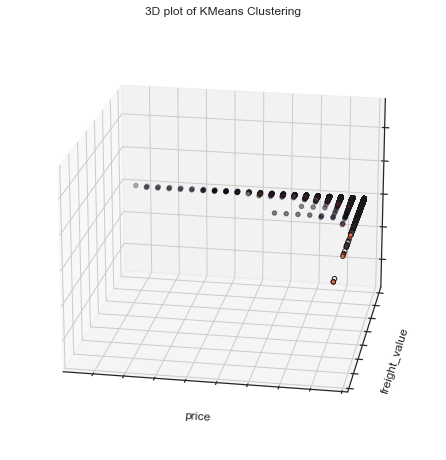

In [42]:
## 3D plot of clustering
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans2.fit(df_k)
labels = kmeans2.labels_
ax.scatter(df_k.iloc[:, 0], df_k.iloc[:, 1],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('price')
ax.set_ylabel('freight_value')

ax.set_title('3D plot of KMeans Clustering')


# DBSCAN

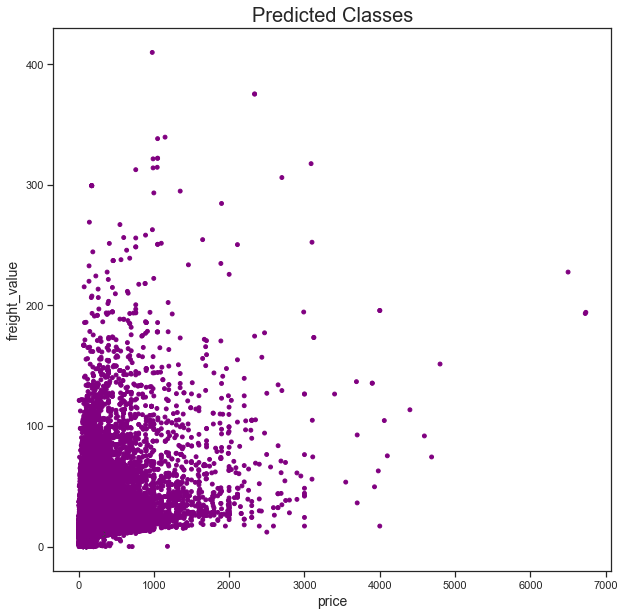

In [73]:
from sklearn.cluster import DBSCAN

# fit the db scan model
dbscan=DBSCAN()
dbscan.fit(df1)
df_db = df1.copy(deep=True)   # copy for not disturbing the dataframe


df_db['DBSCAN_labels']=dbscan.labels_    # tell us that label belongs to cluste

# Plotting resulting clusters from dbscan model
plt.figure(figsize=(10,10))
plt.scatter(df_db['price'],df_db['freight_value'],c=df_db['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Predicted Classes',fontsize=20)
plt.xlabel('price',fontsize=14)
plt.ylabel('freight_value',fontsize=14)
plt.show()

Interesting! All the data points are now of purple color which means they are treated as noise. It is because the value of epsilon is very small and we didn’t optimize parameters. Therefore, we need to find the value of epsilon and minPoints and then train our model again.
For epsilon, I am using the K-distance graph. For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighbors.

In [75]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df1)
distances, indices = nbrs.kneighbors(df1)

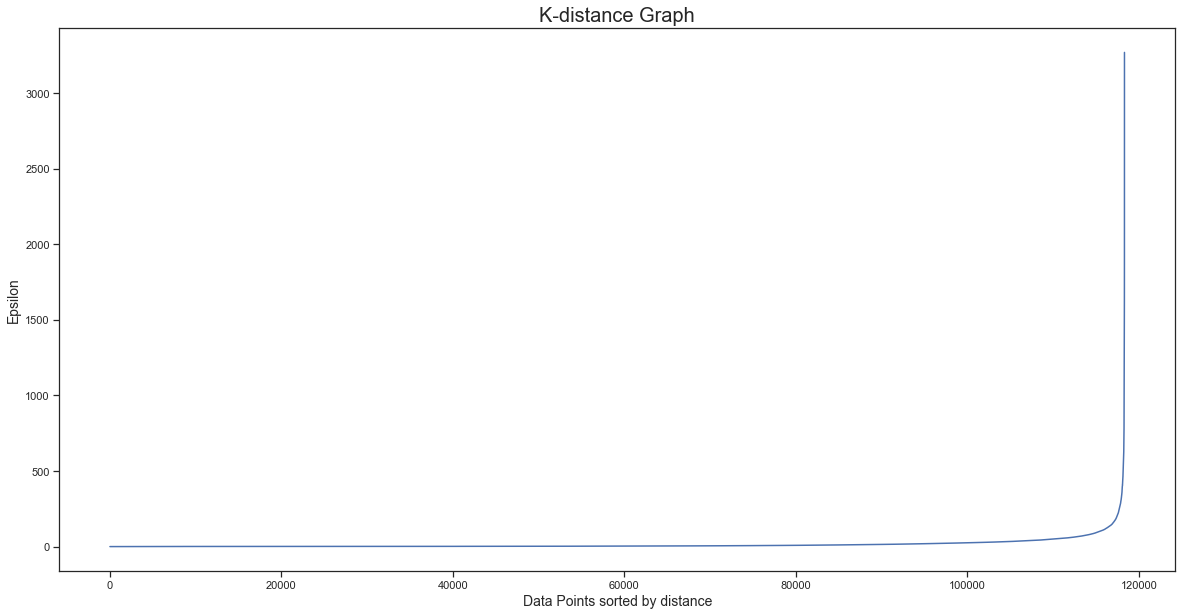

In [76]:
# Plot K-distance graph and find the value of epsilon. 
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is somewhere around 250-300 in this case. Now, it’s time to find the value of minPoints. The value of minPoints also depends on domain knowledge. This time I am taking minPoints as 6:

In [80]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=250,min_samples=6)   # fitting cluster for 250 epsilon value
dbscan_opt.fit(df1)

DBSCAN(eps=250, min_samples=6)

In [81]:
df_db2 = df1.copy(deep=True)   # copy of data frame

df_db2['DBSCAN_opt_labels']=dbscan_opt.labels_    # labels of the cluster
df_db2['DBSCAN_opt_labels'].value_counts()

 0      113578
-1        2110
 1         206
 38        143
 30        115
         ...  
 74          6
 109         6
 127         6
 132         4
 107         4
Name: DBSCAN_opt_labels, Length: 155, dtype: int64

The most amazing thing about DBSCAN is that it separates noise from the dataset pretty well. Here, 0, 1 and -1 are the three different clusters, and rest are the noise. Let’s plot the results and see what we get.

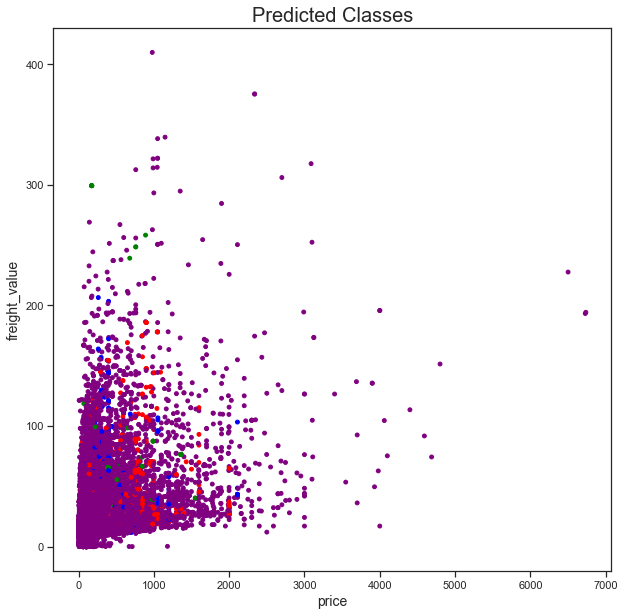

In [82]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df_db2['price'],df_db2['freight_value'],c=df_db2['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)

plt.title('Predicted Classes',fontsize=20)
plt.xlabel('price',fontsize=14)
plt.ylabel('freight_value',fontsize=14)
plt.show()